In [1]:
import numpy as np 
import pandas as pd 
import os
HOME = os.getcwd()


In [2]:
!nvidia-smi

Sun Jul 14 10:06:03 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5771.7/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
# exporting dataset from roboflow
!mkdir {HOME}/datasets
%cd {HOME}/datasets


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="i8iYzppEYGgrh9a6HgGK")
project = rf.workspace("ps1-project-vlayx").project("helmet-final-ciz2y")
version = project.version(2)
dataset = version.download("yolov8")




/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 829.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.3 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.
ydata-profiling 4.6.4 require


Extracting Dataset Version Zip to helmet-final-2 in yolov8:: 100%|██████████| 4298/4298 [00:00<00:00, 4937.38it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True 

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 165MB/s]
New https://pypi.org/project/ultralytics/8.2.56 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/helmet-final-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_la

In [7]:
!ls {HOME}/runs/detect/train/


F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch1395.jpg
P_curve.png					   train_batch1396.jpg
R_curve.png					   train_batch1397.jpg
args.yaml					   train_batch2.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1720951653.3a2c5c212ba5.131.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


/kaggle/working


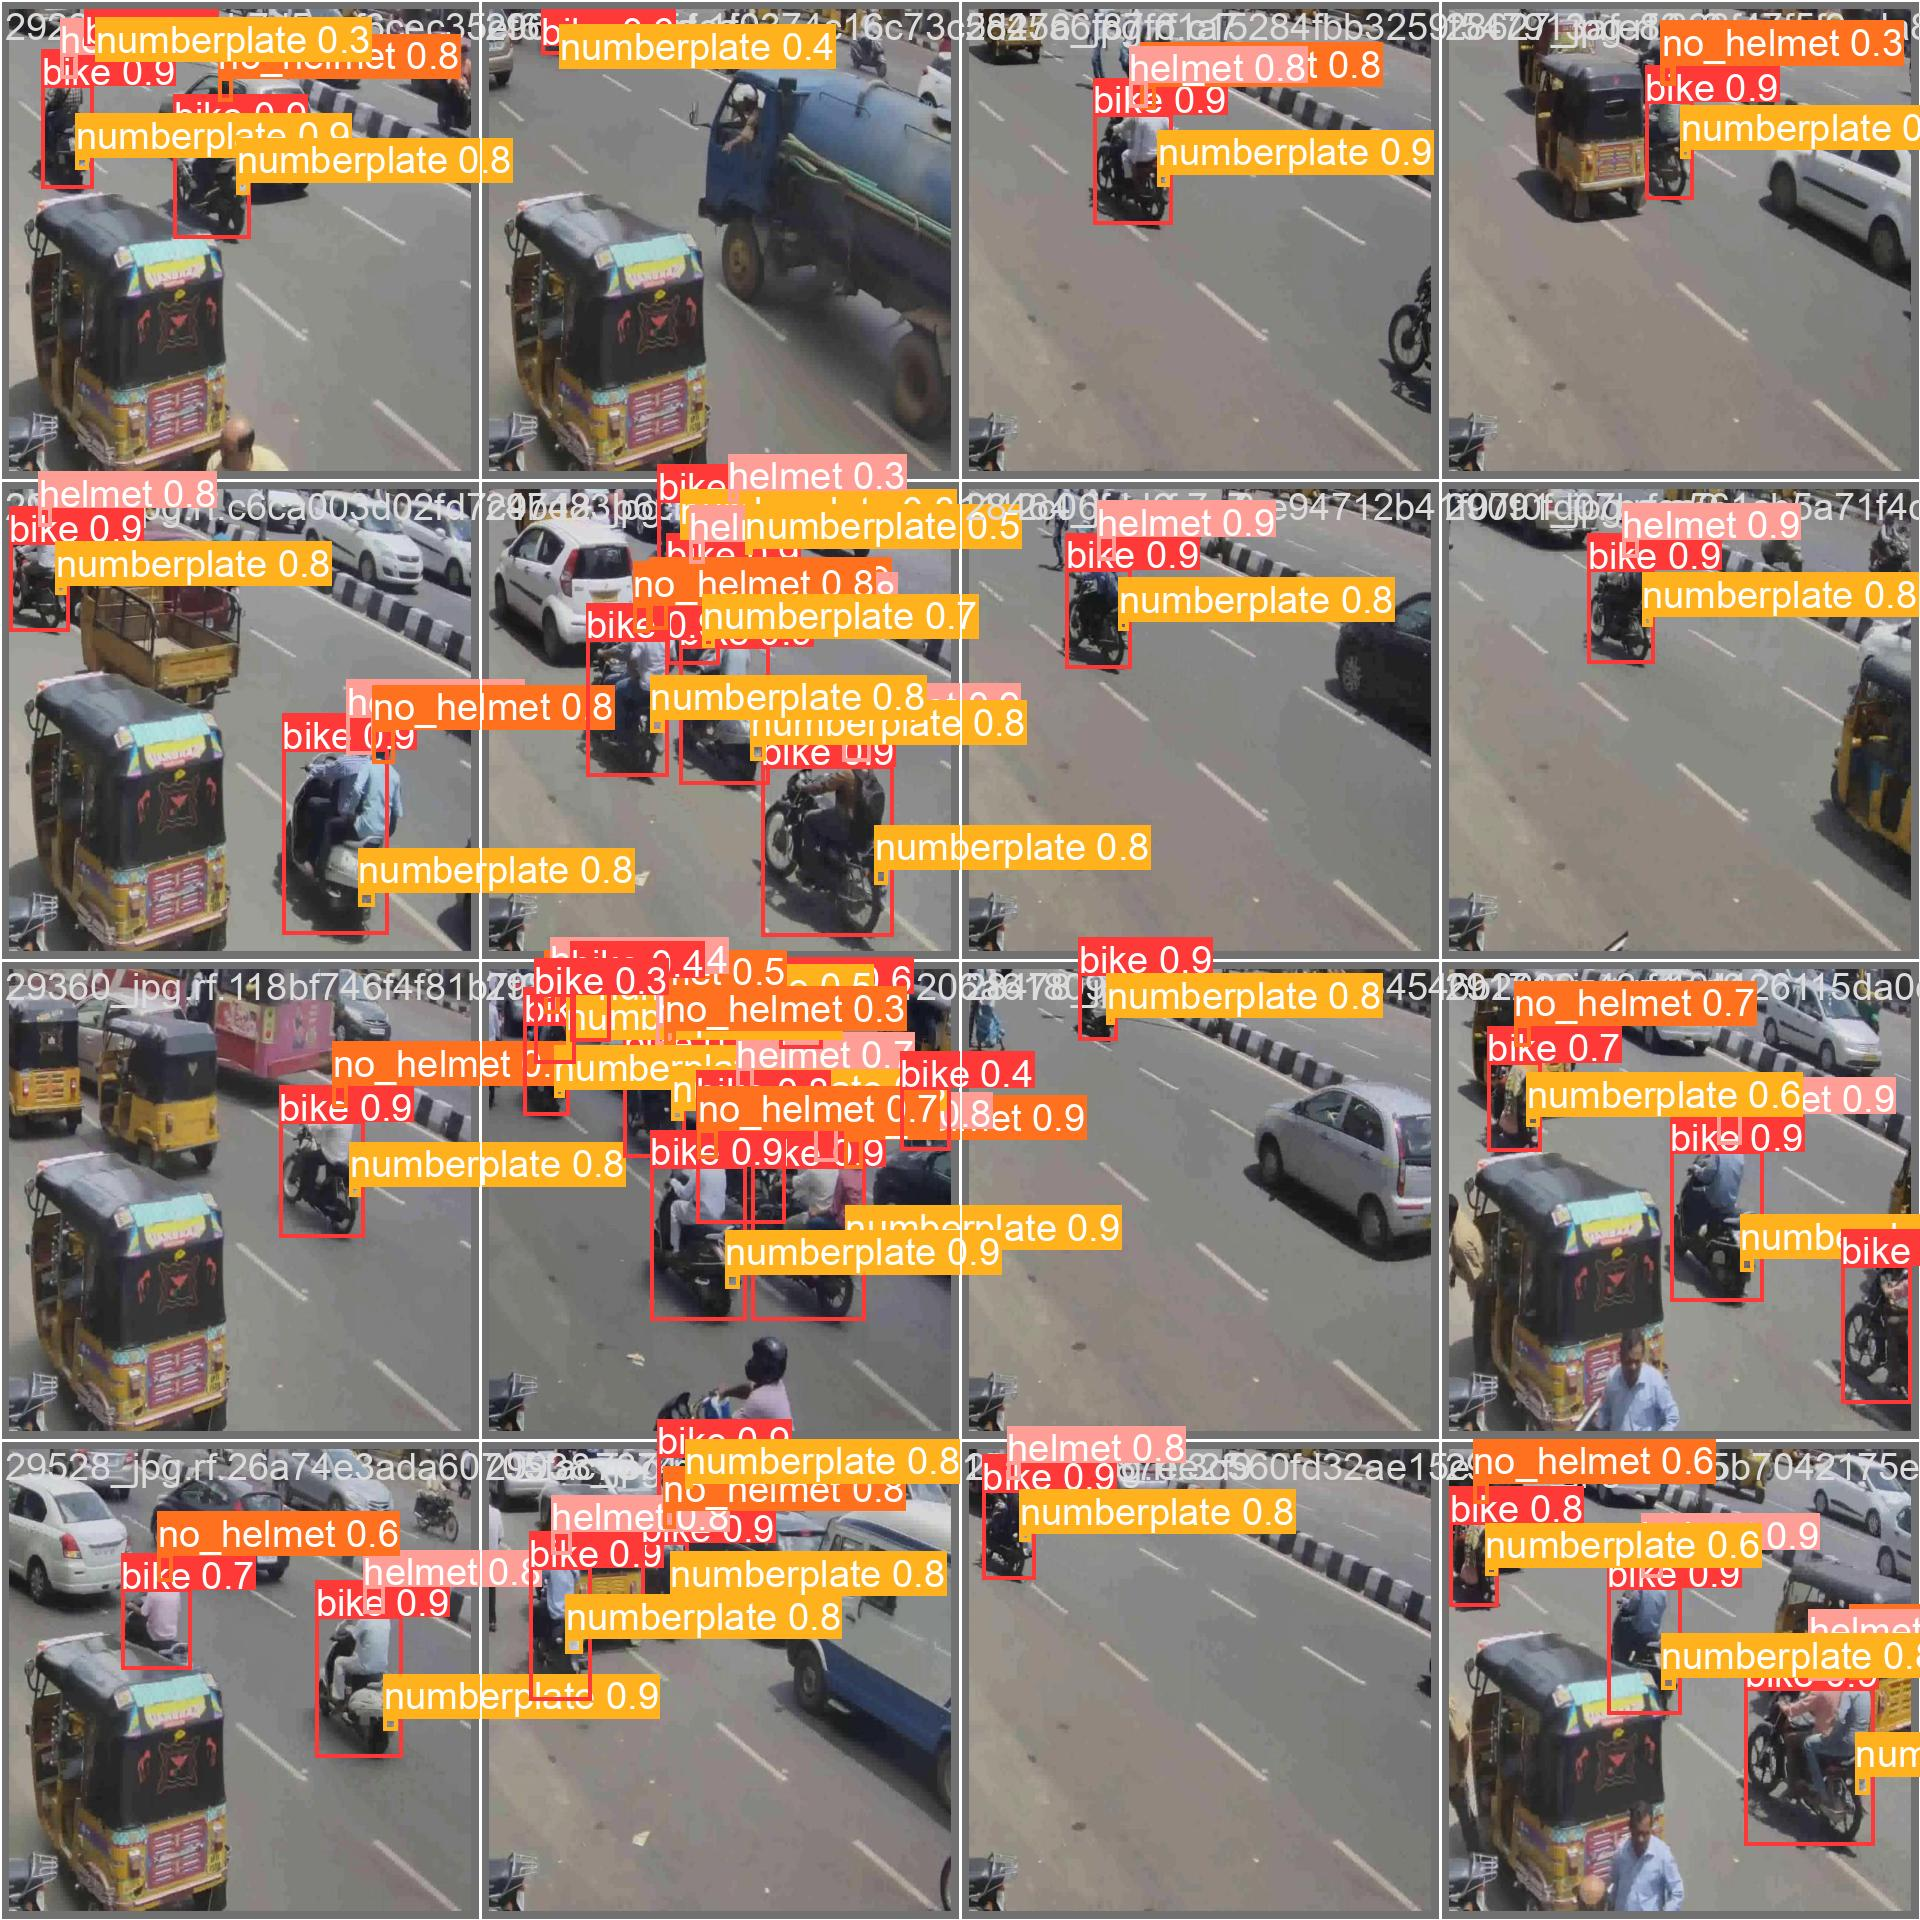

In [8]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)


In [9]:
#Validate model
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/helmet-final-2/valid/labels.cache... 435 
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 63, len(boxes) = 1949. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        435       1949       0.91      0.908      0.947      0.692
                  bike        435        670       0.92      0.919      0.956      0.803
                helmet        435        391      0.897      0.893      0.933      0.687
             no_helmet        435        308      0.878      0.841      0.911      0.608
           numberplate        4

In [11]:
#Inference with model
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/223 /kaggle/working/datasets/helmet-final-2/test/images/0001_jpg.rf.4f5dab35c633892c3754830ea989b43b.jpg: 800x800 1 bike, 1 helmet, 1 numberplate, 22.4ms
image 2/223 /kaggle/working/datasets/helmet-final-2/test/images/0004_jpg.rf.a4005be8efe6693f244624847dcdfc42.jpg: 800x800 1 bike, 1 no_helmet, 1 numberplate, 22.4ms
image 3/223 /kaggle/working/datasets/helmet-final-2/test/images/0008_jpg.rf.eb2caafde7dcc47992b44328d1d3241b.jpg: 800x800 1 bike, 1 helmet, 1 numberplate, 22.4ms
image 4/223 /kaggle/working/datasets/helmet-final-2/test/images/0011_jpg.rf.b2a1fff4d68b6e89411f6108a2edd871.jpg: 800x800 1 bike, 1 helmet, 1 numberplate, 22.4ms
image 5/223 /kaggle/working/datasets/helmet-final-2/test/images/0016_jpg.rf.62c73b6c77d68fb4a286c98dc84a51e2.jpg: 800x800 1 bike, 1 helmet, 1 numberplate, 22.4ms
image 6

In [22]:
# Function to detect helmet
def detect_helmet(image):
    # Save the uploaded image to a temporary location
    temp_image_path = 'temp_image.jpg'
    cv2.imwrite(temp_image_path, image)

    # YOLOv8 inference command
    inference_command = f"yolo task=detect mode=predict model=./runs/detect/train/weights/best.pt conf=0.25 source={temp_image_path} save=False"
    
    # Run the YOLOv8 inference command
    result = subprocess.run(inference_command, shell=True, capture_output=True, text=True)

    # Check the output for the 'helmet' label
    if 'helmet' in result.stdout:
        return True
    else:
        return False

# OCR (Optical Character Recognition) to detect numberplates of traffic violators

In [12]:
#!pip install easyocr
!pip install imutils
!pip install pillow==9.4.0
!pip install pytesserect

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25834 sha256=eb0c69bb318e4e339c670f9449a06cc37956d9f9dccf192e6af7d6fcb19cb0b6
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.2

In [13]:
import cv2
from matplotlib import pyplot as plt
import imutils
import easyocr
import pytesseract

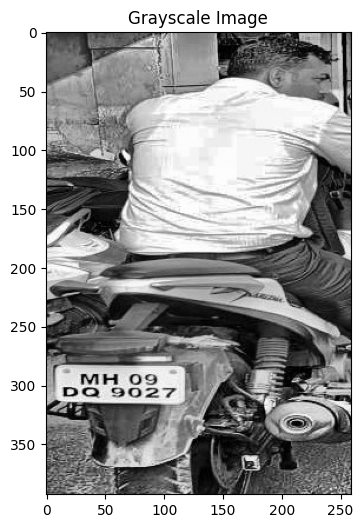

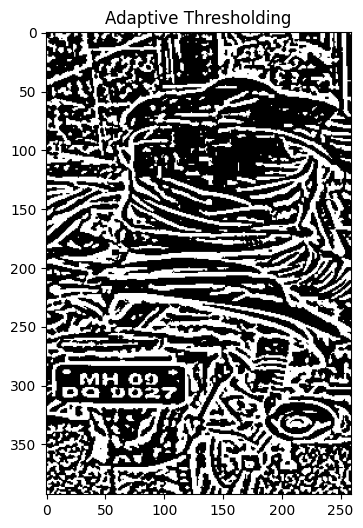

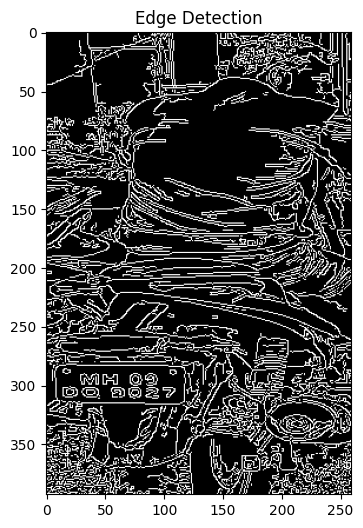

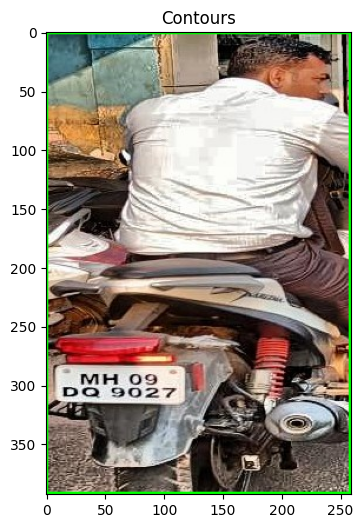

In [15]:
img = cv2.imread('/kaggle/input/helmet-test-set/002.jpg')


#convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Display the grayscale image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.title('Grayscale Image')
plt.show()
#plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# Apply Gaussian blur and adaptive thresholding
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Display the thresholded image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.title('Adaptive Thresholding')
plt.show()

bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 50, 150) #Edge detection

##Display the edges
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.title('Edge Detection')
plt.show()


# Find contours
keypoints = cv2.findContours(bfilter.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
#contours = sorted(contours, key=cv2.contourArea, reverse=True)[:20]

# Draw contours for visualization
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

# Display the image with contours
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.show()

# Filter contours based on aspect ratio, area, and additional properties
location = None
min_aspect_ratio = 1
max_aspect_ratio = 10
min_area = 500
max_area = 15000

for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)
    area = cv2.contourArea(contour)
    bounding_box_area = w * h
    extent = area / float(bounding_box_area)
    
    # Check aspect ratio, area, and extent
    if min_aspect_ratio < aspect_ratio < max_aspect_ratio and min_area < area < max_area and extent > 0.3:
        location = contour
        break

if location is not None:
    # Create a mask for the detected number plate
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

    # Crop the number plate region
    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    cropped_image = gray[topx:bottomx+1, topy:bottomy+1]

    # Display the cropped number plate
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Number Plate')
    plt.show()



#plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break 
        


In [16]:
location

array([[[  3, 321]],

       [[ 11, 283]],

       [[118, 288]],

       [[113, 316]]], dtype=int32)

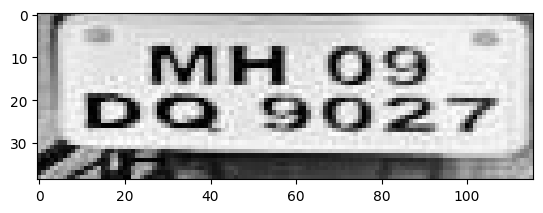

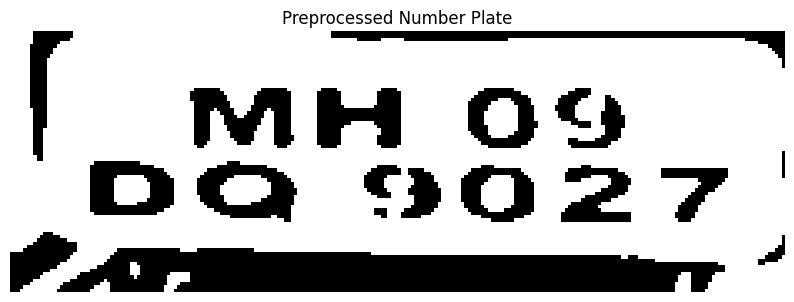

In [17]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
cropped_number_plate = cv2.resize(cropped_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
cropped_number_plate = cv2.GaussianBlur(cropped_number_plate, (3, 3), 0)
cropped_number_plate = cv2.medianBlur(cropped_number_plate, 3)
cropped_number_plate = cv2.threshold(cropped_number_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
cropped_number_plate = cv2.bilateralFilter(cropped_number_plate, 11, 17, 17) #Noise reduction
#cropped_number_plate = cv2.Canny(cropped_number_plate, 50, 150) #Edge detection
kernel = np.ones((2, 2), np.uint8)
cropped_number_plate = cv2.morphologyEx(cropped_number_plate, cv2.MORPH_CLOSE, kernel)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
#cropped_number_plate = cv2.cvtColor(cropped_number_plate, cv2.COLOR_BGR2GRAY)
_, cropped_number_plate = cv2.threshold(cropped_number_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


##Display the preprocessed image to verify the effect of each step.
plt.figure(figsize=(10, 6))
plt.imshow(cropped_number_plate, cmap='gray')
plt.title('Preprocessed Number Plate')
plt.axis('off')
plt.show()


In [18]:
# Use Tesseract to read the text from the number plate
config = '--psm 4 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
text = pytesseract.image_to_string(cropped_number_plate, config=config)

# Print the OCR results
print("Detected Number Plate Text:")
print(text.strip())


Detected Number Plate Text:
MHOY
DQ9027


In [34]:
def detect_number_plate(image):

    img = cv2.imread(image)
    #convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur and adaptive thresholding
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 50, 150) #Edge detection
    # Find contours
    keypoints = cv2.findContours(bfilter.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    # Draw contours for visualization
    img_contours = img.copy()
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)
    
    # Filter contours based on aspect ratio, area, and additional properties
    location = None
    min_aspect_ratio = 1
    max_aspect_ratio = 10
    min_area = 500
    max_area = 15000

    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        area = cv2.contourArea(contour)
        bounding_box_area = w * h
        extent = area / float(bounding_box_area)

        # Check aspect ratio, area, and extent
        if min_aspect_ratio < aspect_ratio < max_aspect_ratio and min_area < area < max_area and extent > 0.3:
            location = contour
            break

    if location is not None:
        # Create a mask for the detected number plate
        mask = np.zeros(gray.shape, np.uint8)
        new_image = cv2.drawContours(mask, [location], 0, 255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)

        # Crop the number plate region
        (x, y) = np.where(mask == 255)
        (topx, topy) = (np.min(x), np.min(y))
        (bottomx, bottomy) = (np.max(x), np.max(y))
        cropped_image = gray[topx:bottomx+1, topy:bottomy+1]



    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break 

    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]
    cropped_number_plate = cv2.resize(cropped_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    cropped_number_plate = cv2.GaussianBlur(cropped_number_plate, (3, 3), 0)
    cropped_number_plate = cv2.medianBlur(cropped_number_plate, 3)
    cropped_number_plate = cv2.threshold(cropped_number_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    cropped_number_plate = cv2.bilateralFilter(cropped_number_plate, 11, 17, 17) #Noise reduction
    #cropped_number_plate = cv2.Canny(cropped_number_plate, 50, 150) #Edge detection
    kernel = np.ones((2, 2), np.uint8)
    cropped_number_plate = cv2.morphologyEx(cropped_number_plate, cv2.MORPH_CLOSE, kernel)
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    #cropped_number_plate = cv2.cvtColor(cropped_number_plate, cv2.COLOR_BGR2GRAY)
    _, cropped_number_plate = cv2.threshold(cropped_number_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


    ##Display the preprocessed image to verify the effect of each step.
    plt.figure(figsize=(10, 6))
    plt.imshow(cropped_number_plate, cmap='gray')
    plt.title('Preprocessed Number Plate')
    plt.axis('off')
    plt.show()

    # Use Tesseract to read the text from the number plate
    config = '--psm 4 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    text = pytesseract.image_to_string(cropped_number_plate, config=config)
    '''
    # Print the OCR results
    print("Detected Number Plate Text:")
    print(text.strip())
    '''
    return (text.strip())

# Deploying pipeline on Streamlit

In [20]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 31.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
import streamlit as st

In [35]:
# Streamlit app
def main():
    st.title("Helmet Detection and Number Plate OCR")

    # File uploader for image upload
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
        # Read the image
        image = Image.open(uploaded_file)
        image = np.array(image)

        # Display the uploaded image
        st.image(image, caption='Uploaded Image.', use_column_width=True)

        # Detect helmet
        helmet_detected = detect_helmet(image)
        
        if not helmet_detected:
            # If no helmet, detect number plate
            numberplate_text = detect_numberplate(image)
            st.write("No helmet detected.")
            st.write("Number plate: ", numberplate_text)
        else:
            st.write("Helmet detected.")

if __name__ == "__main__":
    main()

2024-07-14 11:41:38.850 
  command:

    streamlit run /opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
